In [1]:
import torch
import numpy as np
import pandas as pd
from plot_manager import PlotManager
from dataset import build_dataloaders
from bilstm import BiLSTMAttentionClassifier
from attention_inspector import AttentionInspector

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMAttentionClassifier(
    pc_vocab=9,
    acc_vocab=10,
    oct_vocab=7,
    dur_vocab=33,
    meas_vocab=4,
    emb_dim=32,
    lstm_hidden=128,
    num_classes=12,
    dropout=0.3
)
model.to(device)
checkpoint = torch.load("best_model.pt", map_location=device)
model.load_state_dict(checkpoint["model_state_dict"])
print("Loaded best model from epoch:", checkpoint["epoch"])

_, _, _, test_loader = build_dataloaders(
    "vocab.pkl", "dataset.pkl", batch_size=8)

Loaded best model from epoch: 15


In [3]:
ai = AttentionInspector(device, model, test_loader)

In [4]:
(
    all_labels,
    all_preds,
    all_f_names,
    all_attn_weights,
    all_true_lengths,
    all_pcs,
    all_accs,
    all_meas,
    all_durs
) = ai.get_predictions()

In [5]:
(
    makam_vocab,
    makam_vocab_inv,
    pc_vocab,
    pc_vocab_inv,
    acc_vocab,
    acc_vocab_inv,
    dur_vocab,
    dur_vocab_inv
) = ai.export_vocabs()

In [6]:
makam_names = makam_vocab.keys()

In [7]:
list(makam_names)

['hicaz',
 'nihavent',
 'ussak',
 'rast',
 'huzzam',
 'segah',
 'huseyni',
 'mahur',
 'hicazkar',
 'kurdilihicazkar',
 'muhayyer',
 'saba']

In [8]:
results = ai.evaluate_classification(all_labels, all_preds, makam_names)

In [9]:
df = pd.DataFrame(data=results["report"])
print(df.T)
# df.T.to_excel("clf_report.xlsx")

                 precision    recall  f1-score     support
hicaz             1.000000  1.000000  1.000000   27.000000
nihavent          1.000000  1.000000  1.000000   18.000000
ussak             0.800000  0.857143  0.827586   14.000000
rast              0.923077  1.000000  0.960000   12.000000
huzzam            0.944444  1.000000  0.971429   17.000000
segah             0.954545  0.954545  0.954545   22.000000
huseyni           0.818182  0.818182  0.818182   11.000000
mahur             1.000000  0.947368  0.972973   19.000000
hicazkar          1.000000  1.000000  1.000000   11.000000
kurdilihicazkar   1.000000  1.000000  1.000000    6.000000
muhayyer          1.000000  0.777778  0.875000    9.000000
saba              1.000000  1.000000  1.000000    9.000000
accuracy          0.954286  0.954286  0.954286    0.954286
macro avg         0.953354  0.946251  0.948310  175.000000
weighted avg      0.956186  0.954286  0.954183  175.000000


In [10]:
results["confusion_matrix"]

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  9,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9]])

In [11]:
pm = PlotManager()

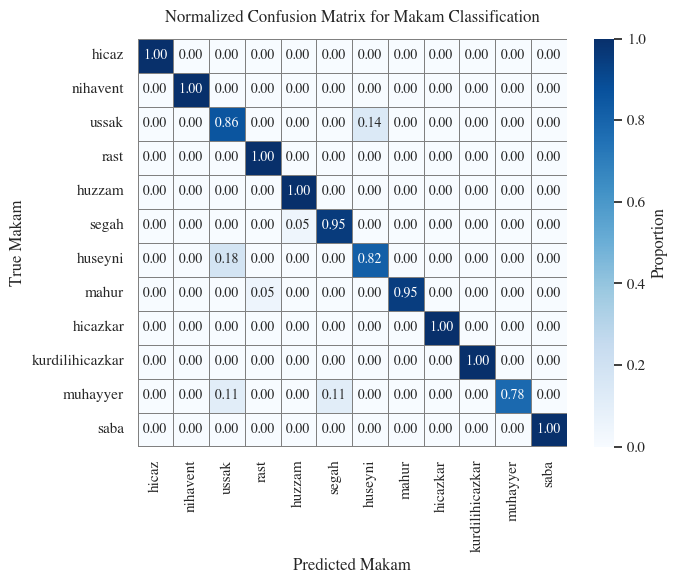

In [12]:
pm.plot_confusion_matrix(
    results["confusion_matrix"],
    makam_vocab.keys(),
    title="Normalized Confusion Matrix for Makam Classification",
    # save_fig=True
)

In [13]:
mn_list = list(makam_names)
for i, (l, p, t) in enumerate(zip(all_labels, all_preds, all_true_lengths)):
    if l == 0 and l == p:
        print(i, l, p, t, mn_list[l])

3 0 0 410 hicaz
4 0 0 405 hicaz
6 0 0 256 hicaz
18 0 0 626 hicaz
31 0 0 302 hicaz
41 0 0 680 hicaz
54 0 0 226 hicaz
70 0 0 98 hicaz
76 0 0 403 hicaz
80 0 0 704 hicaz
89 0 0 595 hicaz
95 0 0 22 hicaz
102 0 0 444 hicaz
105 0 0 610 hicaz
107 0 0 497 hicaz
108 0 0 482 hicaz
109 0 0 441 hicaz
113 0 0 698 hicaz
117 0 0 296 hicaz
123 0 0 521 hicaz
146 0 0 411 hicaz
149 0 0 328 hicaz
151 0 0 192 hicaz
153 0 0 497 hicaz
156 0 0 368 hicaz
161 0 0 426 hicaz
170 0 0 566 hicaz


In [14]:
# i = 6  # index of the piece in the test set
i = 18  # index of the piece in the test set

(
    attn_piece,
    pcs_piece,
    accs_piece,
    meas_piece,
    durs_piece
) = ai.get_single_piece_ai(i)

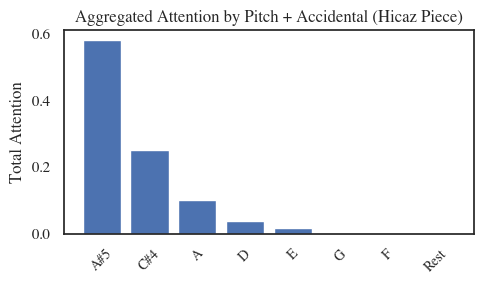

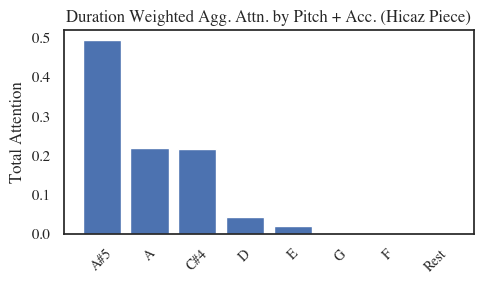

In [15]:
agg_pitch_acc = ai.aggregate_attention_by_pitch_acc(
    attn_piece, pcs_piece, accs_piece)
agg_pitch_acc = ai.normalize_attention(agg_pitch_acc)

pm.plot_agg_attention_by_pitch(
    agg_pitch_acc,
    ai,
    title="Aggregated Attention by Pitch + Accidental (Hicaz Piece)",
    # save_fig=True
)

agg_duration = ai.aggregate_attention_pitch_acc_duration(
    attn_piece, pcs_piece, accs_piece, durs_piece
)
agg_duration = ai.normalize_attention(agg_duration)

pm.plot_agg_attention_by_pitch_duration(
    agg_duration,
    ai,
    title="Duration Weighted Agg. Attn. by Pitch + Acc. (Hicaz Piece)",
    # save_fig=True
)

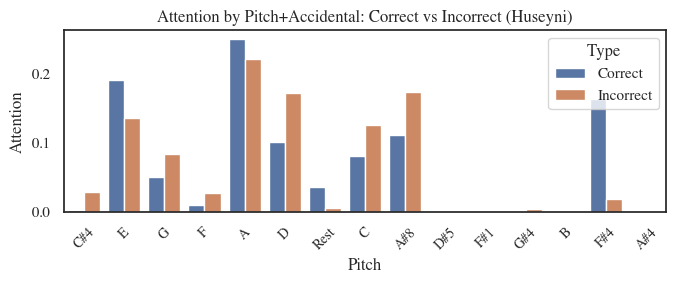

Entropy (Correct): 1.99711690407259
Entropy (Incorrect): 2.027367275992545


In [16]:
makam = "huseyni"
pm.plot_agg_attention_correct_vs_incorrect(
    makam,
    ai,
    # save_fig=True
)

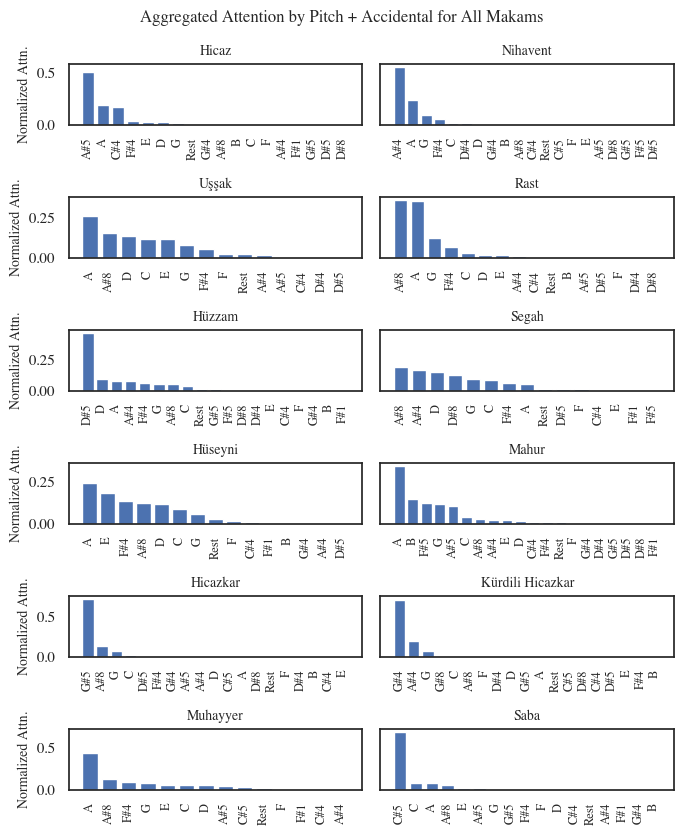

In [17]:
makam_list = [
    {"id": "hicaz", "name": "Hicaz"},
    {"id": "nihavent", "name": "Nihavent"},
    {"id": "ussak", "name": "Uşşak"},
    {"id": "rast", "name": "Rast"},
    {"id": "huzzam", "name": "Hüzzam"},
    {"id": "segah", "name": "Segah"},
    {"id": "huseyni", "name": "Hüseyni"},
    {"id": "mahur", "name": "Mahur"},
    {"id": "hicazkar", "name": "Hicazkar"},
    {"id": "kurdilihicazkar", "name": "Kürdili Hicazkar"},
    {"id": "muhayyer", "name": "Muhayyer"},
    {"id": "saba", "name": "Saba"}
]

pm.plot_agg_attn_by_pitch_acc_all_makams(
    makam_list,
    ai,
    title="Aggregated Attention by Pitch + Accidental for All Makams",
    # save_fig=True
)

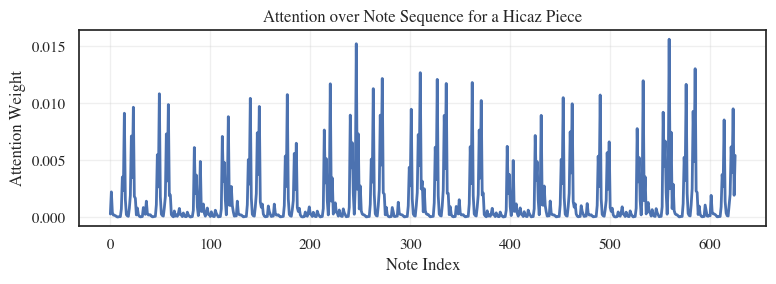

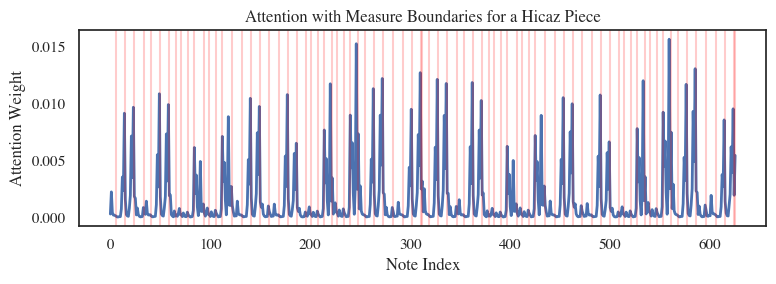

In [18]:
pm.plot_attention_over_time(
    attn_piece,
    title="Attention over Note Sequence for a Hicaz Piece",
    # save_fig=True
)
# pm.plot_attention_with_pitch(
#     attn_piece,
#     pcs_piece,
#     pc_vocab_inv
# )
# pm.plot_attention_with_combined_pitch(
#     attn_piece,
#     pcs_piece,
#     accs_piece,
#     ai
# )
pm.plot_attention_with_measures(
    attn_piece,
    meas_piece,
    title="Attention with Measure Boundaries for a Hicaz Piece",
    # save_fig=True
)

In [19]:
df_s = ai.collect_attn_dur_bin_stats(
    bin_x="Very short (≤1/16)",
    bin_y="Very long (>3/4)",
    target_makam=None
)

Kruskal-Wallis H = 367.335, p-value = 3.1661e-78

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Dunn post-hoc with Holm correction
                     Long (≤3/4)  Medium (≤3/8)  Short (≤3/16)  \
Long (≤3/4)         1.000000e+00   9.827765e-01   9.032098e-12   
Medium (≤3/8)       9.827765e-01   1.000000e+00   9.686924e-64   
Short (≤3/16)       9.032098e-12   9.686924e-64   1.000000e+00   
Very long (>3/4)    6.367240e-02   4.263506e-02   9.923666e-11   
Very short (≤1/16)  3.156001e-09   1.329580e-48   1.260946e-02   

                    Very long (>3/4)  Very short (≤1/16)  
Long (≤3/4)             6.367240e-02        3.156001e-09  
Medium (≤3/8)           4.263506e-02        1.329580e-48  
Short (≤3/16)           9.923666e-11        1.260946e-02  
Very long (>3/4)        1.000000e+00        3.156001e-09  
Very short (≤1/16)      3.156001e-09        1.000000e+00  

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Cliff's delta = -0.156

- - - - - - - -

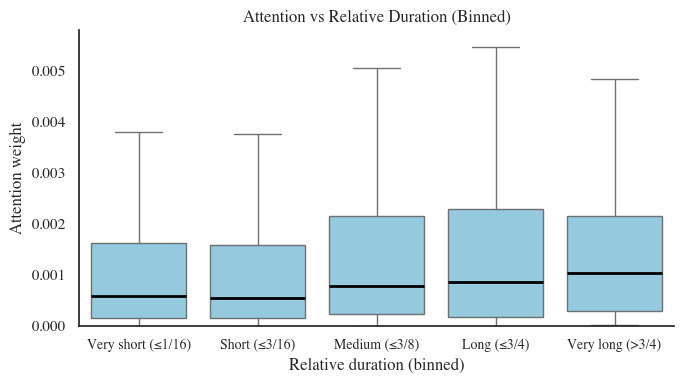

In [20]:
pm.plot_attention_vs_duration_boxplot(
    df_s,
    title="Attention vs Relative Duration (Binned)",
    # save_fig=True
)